In [2]:
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, tree
%pylab inline

ImportError: cannot import name 'cross_validation' from 'sklearn' (C:\Users\Kostya\Anaconda3\lib\site-packages\sklearn\__init__.py)

In [9]:
df = datasets.make_classification(n_features=2, n_samples=1000
                                    , n_informative=2, n_classes=3, n_redundant=0, n_clusters_per_class = 1)
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

In [10]:
x1 = list(map(lambda x: x[0],df[0]))
x2 = list(map(lambda x: x[1],df[0]))
y = df[1]

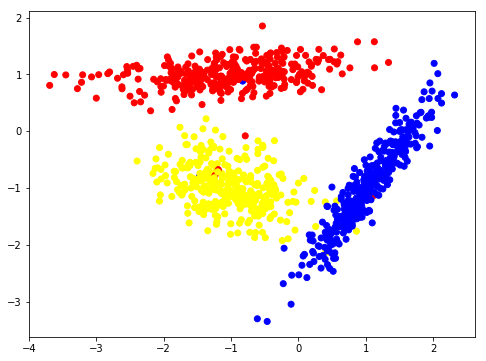

In [11]:
plt.figure(figsize = (8,6))
plt.scatter(x1,x2,c = y, cmap = colors)

In [12]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
df[0], df[1], test_size = 0.3)

In [13]:
#dtc
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(metrics.classification_report(y_train, y_train_pred))
print(metrics.classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       229
          1       0.99      1.00      1.00       234
          2       1.00      0.99      0.99       237

avg / total       1.00      1.00      1.00       700

             precision    recall  f1-score   support

          0       1.00      0.95      0.98       108
          1       0.95      0.98      0.97        99
          2       0.96      0.98      0.97        93

avg / total       0.97      0.97      0.97       300



In [3]:
#Разделяющая поверхность
def get_meshgrid(data, step = 0.03, border = 5.0):
    x_min, x_max = data[:,0].min() - border, data[:,0].max()+border
    y_min, y_max = data[:,1].min() - border, data[:,1].max()+border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [ ]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

In [20]:
def plot_decision_surface(estimator, train_data, train_y, test_data, test_y,
                         colors = colors, light_colors = light_colors):
    estimator.fit(train_data, train_y)
    
    plt.figure(figsize = (16,6))
    
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(
        estimator.predict(np.c_[xx.ravel(),yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx,yy, mesh_predictions, cmap = light_colors)
    plt.scatter(train_data[:,0], train_data[:,1], c = train_y, s = 10, cmap = colors)
    plt.title('Train data, accuracy = {:.2f}'.format(metrics.accuracy_score(train_y,estimator.predict(train_data))))
    
    plt.subplot(1,2,2)
    plt.pcolormesh(xx,yy, mesh_predictions, cmap = light_colors)
    plt.scatter(test_data[:,0], test_data[:,1], c = test_y, s = 10, cmap = colors)
    plt.title('Test data, accuracy = {:.2f}'.format(metrics.accuracy_score(test_y,estimator.predict(test_data))))

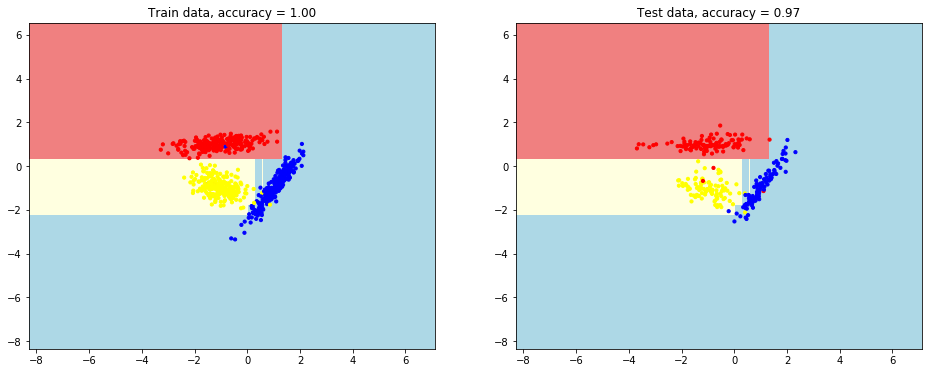

In [25]:
estimator = tree.DecisionTreeClassifier()
plot_decision_surface(estimator,X_train,y_train,X_test,y_test)

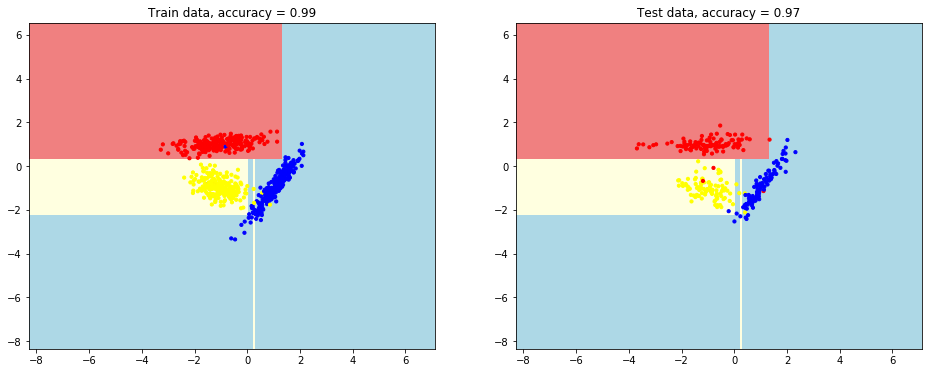

In [23]:
estimator = tree.DecisionTreeClassifier(min_samples_leaf=3)
plot_decision_surface(estimator,X_train,y_train,X_test,y_test)